In [34]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statistics import mode

In [7]:
#Cargamos la funcion generadora de datos
from numpy.typing import NDArray
def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float],
 frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
 ts = np.arange(0.,t_max,dt)
 ys = np.zeros_like(ts,dtype=float)
 for A,f in zip(amplitudes,frecuencias):
  ys += A*np.sin(2*np.pi*f*ts)
  ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
 return ts,ys

In [8]:
#1.a) Implementamos la transformada explicita de fourier 
def Fourier(t, y, f:float) -> complex:
  F=0
  for i in range(len(t)):
    F += y[i]*np.exp(-2j*np.pi*f*t[i])
  return F

In [9]:
#Generamos los datos para dos señales, una con ruido y otra sin 
señal_sin_ruido = datos_prueba(15,0.1,[1,1.5,2],[1,.614,2.8])
señal_con_ruido = datos_prueba(15,0.1,[1,1.5,2],[1,.614,2.8],ruido=0.8)
ts= señal_sin_ruido[0]
ys= señal_sin_ruido[1]

ts_ruido = señal_con_ruido[0]
ys_ruido = señal_con_ruido[1]

In [10]:
freq= np.linspace(0,5,500)
FFT= [Fourier(ts,ys,f) for f in freq]
FFT_ruido = [Fourier(ts_ruido,ys_ruido,f) for f in freq]

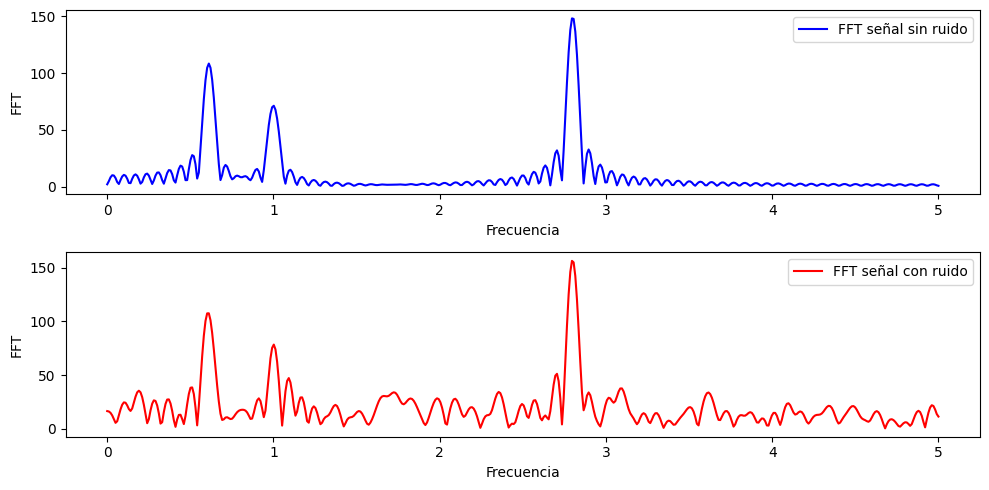

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

ax1.plot(freq,np.abs(FFT),c="b",label="FFT señal sin ruido")
ax1.set_xlabel("Frecuencia")
ax1.set_ylabel("FFT")
ax1.legend()

ax2.plot(freq,np.abs(FFT_ruido),c="r",label="FFT señal con ruido")
ax2.set_xlabel("Frecuencia")
ax2.set_ylabel("FFT")
ax2.legend()

plt.tight_layout()

plt.savefig("1.a.pdf", format="pdf")

In [12]:
print ("1.a) Cuando el valor del ruido es igual o mayor al valor de la amplitud de una las frecuencias no se puede distingir la frecuencia asociada a esa amplitud  ")

1.a) Cuando el valor del ruido es igual o mayor al valor de la amplitud de una las frecuencias no se puede distingir la frecuencia asociada a esa amplitud  


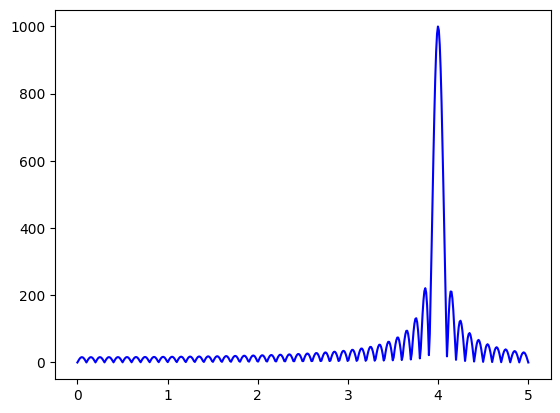

In [13]:
#1.b
#Creamos la señal
señal_fundamental = datos_prueba(10,0.01,[2],[4])
ts_fund = señal_fundamental[0]
ys_fund= señal_fundamental[1]

freq_fund= np.linspace(0,5,500)
FFT_fund= [Fourier(ts_fund,ys_fund,f) for f in freq_fund]
FTT_fund_abs= np.abs(FFT_fund)


plt.plot(freq_fund,FTT_fund_abs,color="b")

In [14]:
max(FTT_fund_abs)

999.5846225807873

In [15]:
def gaussiana(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


In [16]:
def FWHM (f,FFT_abs):
    mascara = (f> 4- 0.06) & ( f< 4+ 0.06)
    freq_fit = f[mascara]
    FFT_fit = FFT_abs[mascara]
    p, _ = curve_fit(gaussiana, freq_fit, FFT_fit, p0=[max(FFT_abs),4, 0.02])
    A, mu, sigma = p
    FWHM = 2 * np.sqrt(2 * np.log(2)) * sigma
    return FWHM

#Prueba señal
FWHM(freq_fund,FTT_fund_abs)



0.12316775567139682

In [17]:
#Ahora tenemos que ver la tendencia cambian dt
t_max = np.linspace(10,300,15)
FWHM_x= []
for i in t_max:
    señal_x = datos_prueba(i,0.01,[2],[4])
    ts_x = señal_x[0]
    ys_x= señal_x[1]
    freq_x= np.linspace(0,5,500)
    FFT_fundx= [Fourier(ts_x,ys_x,f) for f in freq_x]
    FTT_absx= np.abs(FFT_fundx)
    valor=FWHM(freq_x,FTT_absx)
    FWHM_x.append(valor)


In [131]:
def ajuste_racional(x, a, b, c):
    return a / (x + b) + c

In [ ]:
#Agamos el ajuste a los datos 
p_o, _ = curve_fit(ajuste_racional,t_max, FWHM_x, maxfev=5000)
a,b,c = p_o


-3.35649316340223

In [141]:
x_ajuste = np.linspace(np.min(t_max),np.max(t_max),100)
ajuste= ajuste_racional(x_ajuste,a,b,c)

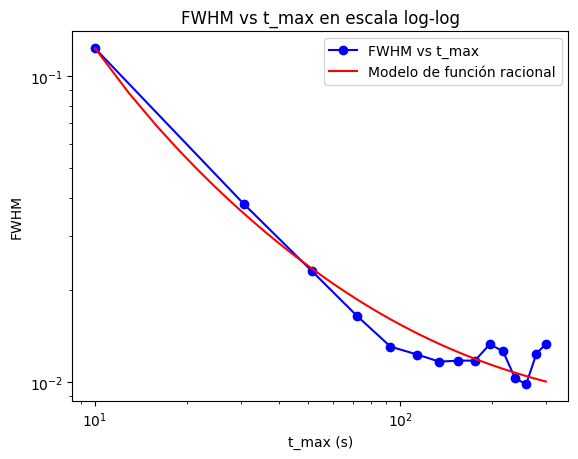

In [147]:
plt.loglog(t_max, FWHM_x, 'o-', label='FWHM vs t_max',color= "b")
plt.loglog(x_ajuste,ajuste,label="Modelo de función racional",color="r")
plt.xlabel("t_max (s)")
plt.ylabel("FWHM")
plt.title("FWHM vs t_max en escala log-log")
plt.legend()
plt.savefig("1.b.pdf")

In [148]:
#Punto 1.c
datos = np.loadtxt("Datos/Datos_punto1.csv", delimiter=";")

t = np.array(datos[:, 0])
y = np.array(datos[:, 1])
sigma_y= np.array(datos[:, 2] ) 


#Calculamos la frecuencia de Nyquist
delta_t=np.diff(t)
val_d_t=mode(delta_t)
f_nyquist = 1 / (2 * val_d_t)
print(f"1.c) frecuencia Nyquist: {f_nyquist:.6f}")

1.c) frecuencia Nyquist: 0.249929


In [149]:
delta_t=np.diff(t)
val_d_t=mode(delta_t)
#Eliminamos el valor del promedio de la intensidad de los datos
y_filt=y-y.mean()

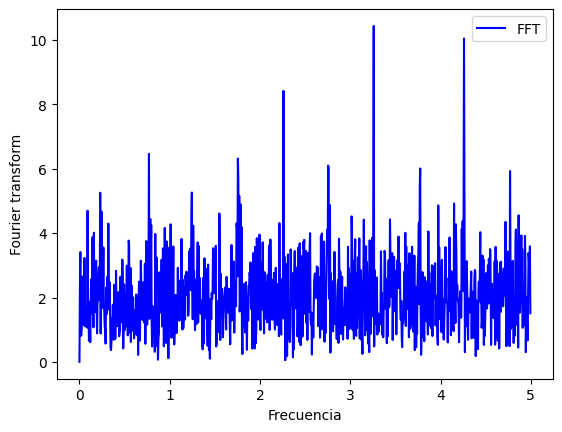

In [150]:
f=np.arange(0,5,0.005)
FFT_data= np.abs(Fourier(t,y_filt,f))
plt.plot(f,FFT_data,label="FFT",color="b")
plt.xlabel("Frecuencia")
plt.ylabel("Fourier transform")
plt.legend()

In [151]:
i_max=np.argmax(FFT_data)
frec_true=round(f[i_max],2)
print(f"1.c) f true: {frec_true}/Día")


1.c) f true: 3.26/Día


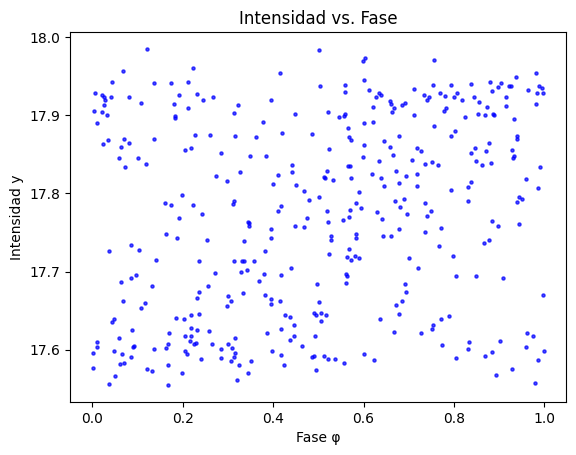

In [87]:
phi = np.mod(frec_true* t, 1)

# Graficar y vs. φ
plt.figure()
plt.scatter(phi, y, s=5, alpha=0.7, label="Datos",c="b")
plt.xlabel("Fase φ")
plt.ylabel("Intensidad y")
plt.title("Intensidad vs. Fase")
plt.savefig("1.c.pdf")
plt.show()